## Neural Network

In [2]:
#

import numpy as np

import matplotlib.pyplot as plt

import copy as copy

from neuralnetwork.neural_network_module import NeuralNetwork, Layer
from neuralnetwork.neural_network_module import train_nn_classification, one_hot_to_predictions, prediction_accuracy

np.random.seed(101)

### Create and plot data series

In [3]:
#

def grid_X_by_L1(X, points, distances):
    yy = np.zeros((X.shape[0],1))
    for kd, distance in enumerate(distances):
        for kp in points:
            idx = np.where(abs(X[:,0] - kp) <= distance)
            yy[idx,0] = kd+1
    return yy

def grid_Y_by_L1(X, points, distances):
    yy = np.zeros((X.shape[0],1))
    for kd, distance in enumerate(distances):
        for kp in points:
            idx = np.where(abs(X[:,1] - kp) <= distance)
            yy[idx,0] = kd+1
    return yy

def grid_by_L2(X, points, distances):
    yy = np.zeros((X.shape[0],1))
    for kd, distance in enumerate(distances):
        for kx in points:
            for ky in points:
                idx = np.where(((X[:,0] - kx)**2 + (X[:,1] - ky)**2 <= distance**2))
                yy[idx,0] = kd+1
    return yy

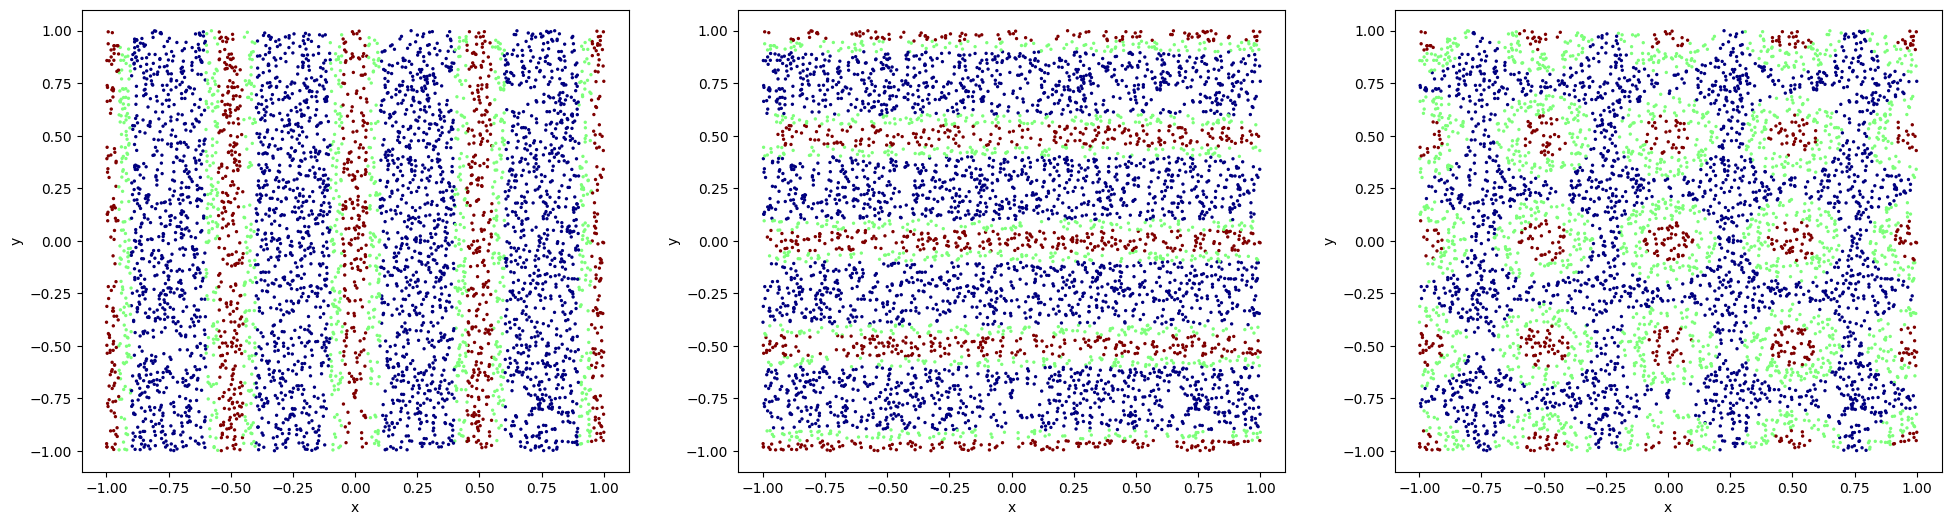

In [4]:
# Create data for sinusoid

N = int(1e3) # number of samples

xx = 2*(np.random.rand(N,2) - 0.5)

yy = np.zeros((N,3), dtype=int)

yy[:,0] = grid_X_by_L1(xx, np.arange(-1,1.5,0.5), [0.1, 0.05]).reshape(-1)
yy[:,1] = grid_Y_by_L1(xx, np.arange(-1,1.5,0.5), [0.1, 0.05]).reshape(-1)
yy[:,2] = grid_by_L2(xx, np.arange(-1,1.5,0.5), [0.2, 0.1]).reshape(-1)

plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
# plt.imshow(zxp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.scatter(xx[:,0], xx[:,1], c=yy[:,0]/2, cmap="jet", s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,3,2)
# plt.imshow(zyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.scatter(xx[:,0], xx[:,1], c=yy[:,1]/2, cmap="jet", s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,3,3)
# plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.scatter(xx[:,0], xx[:,1], c=yy[:,2]/2, cmap="jet", s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# print(xx)
# print(yy)

### Split data into training and test sets

In [5]:
#

train_test_split = 0.8

# split into train and test sets
idx_train = range(0,int(train_test_split*xx.shape[0])) # training set indexes
X_train = xx[idx_train,:]
Y_train = yy[idx_train,:]

idx_test = range(int(train_test_split*xx.shape[0]),xx.shape[0]) # test set indexes
X_test = xx[idx_test,:]
Y_test = yy[idx_test,:]

### Create functions for training neural network and assessing its performance

In [6]:
# #

# def one_hot(Y, num_cols:int=2):
#     # one_hot_Y = np.zeros((Y.shape[0], Y.max()+1))
#     one_hot_Y = np.zeros((Y.shape[0], num_cols))
#     one_hot_Y[np.arange(0, Y.shape[0]), Y] = 1
#     return one_hot_Y

# def get_predictions(A2):
#     return np.argmax(A2, 1).reshape(-1,1)

# def get_accuracy(Y_pred, Y):
#     # print("Values:", Y.T)
#     # print("Predictions:", Y_pred.T)    
#     return np.sum(Y_pred == Y)/Y.shape[0]

# def train_nn(NN: "NeuralNetwork", X_train, Y_train, alpha, iterations=100, intervals=10, X_test=None, Y_test=None):
#     train_accuracy_list = []
#     test_accuracy_list = []
#     NN_list = []
#     epoch_list = []
#     for k1 in range(iterations):
#         NN._compute_output(X_train)
#         NN._train_step(X_train, one_hot(Y_train[:,0], 3), alpha)
#         Y_pred = get_predictions(NN._compute_output(X_train))
#         if k1 == 0 or (k1+1) % intervals == 0:
#             print("")
#             Y_pred_train = get_predictions(NN._compute_output(X_train))
#             train_accuracy = get_accuracy(Y_pred_train, Y_train)
#             train_accuracy_list.append(train_accuracy)
#             if X_test is None and Y_test is None:
#                 print(f"Iteration: {k1} | Train accuracy: {train_accuracy:0.4f}")
#             if X_test is not None and Y_test is not None:
#                 Y_pred_test = get_predictions(NN._compute_output(X_test))
#                 test_accuracy = get_accuracy(Y_pred_test, Y_test)
#                 test_accuracy_list.append(test_accuracy)
#                 print(f"Iteration: {k1} | Train accuracy: {train_accuracy:0.4f} | Test accuracy: {test_accuracy:0.4f}")
#             print(f"Train Targets:     {[x for x in Y_train[0:24,0]]}")
#             print(f"Train Predictions: {[x for x in Y_pred[0:24,0]]}")

#             epoch_list.append(k1)
#             NN_list.append(copy.deepcopy(NN))

#     return NN_list, train_accuracy_list, test_accuracy_list, epoch_list


### Create and train neural network and analyze its performance

In [7]:
#

nn = NeuralNetwork()

layer_list = []
# layer_list.append(Layer())

nn._add_layers([Layer(2, None)])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "linear")])
nn._add_layers([Layer(3, "softmax")])

NN_list, train_accuracy, test_accuracy, epochs = train_nn_classification(nn, X_train, Y_train[:,[2]], 0.020, 20000, 1000, X_test, Y_test[:,[2]])

print("")
print("Training Complete")
print(f"Train accuracy: {prediction_accuracy(one_hot_to_predictions(nn._compute_output(X_train)), Y_train[:,[2]]):0.4f}")
print(f"Test accuracy: {prediction_accuracy(one_hot_to_predictions(nn._compute_output(X_test)), Y_test[:,[2]]):0.4f}")


Neural Network NN01 initialized
Layer L01 initialized | Neurons: 2 | Activation: linear
NN01 added layer L01 with 2 neurons and linear activation
Layer L02 initialized | Neurons: 16 | Activation: relu
NN01 added layer L02 with 16 neurons and relu activation
Layer L03 initialized | Neurons: 16 | Activation: relu
NN01 added layer L03 with 16 neurons and relu activation
Layer L04 initialized | Neurons: 16 | Activation: relu
NN01 added layer L04 with 16 neurons and relu activation
Layer L05 initialized | Neurons: 16 | Activation: relu
NN01 added layer L05 with 16 neurons and relu activation
Layer L06 initialized | Neurons: 16 | Activation: relu
NN01 added layer L06 with 16 neurons and relu activation
Layer L07 initialized | Neurons: 16 | Activation: relu
NN01 added layer L07 with 16 neurons and relu activation
Layer L08 initialized | Neurons: 16 | Activation: relu
NN01 added layer L08 with 16 neurons and relu activation
Layer L09 initialized | Neurons: 16 | Activation: relu
NN01 added laye

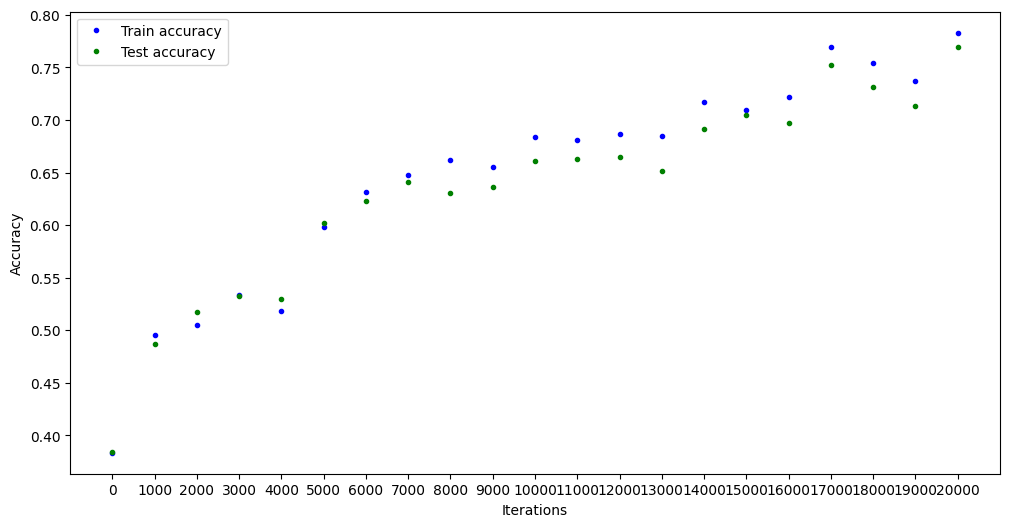

In [8]:
#

plt.figure(figsize=(12,6))
plt.plot(epochs, train_accuracy, 'b.', label="Train accuracy")
plt.plot(epochs, test_accuracy, 'g.', label="Test accuracy")
plt.xticks(epochs)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
# xp, yp = np.meshgrid(sorted(X_train[:,0]), sorted(X_train[:,1]))
# zxp_train = np.zeros(xp.shape)
# zyp_train = np.zeros(xp.shape)
# zxyp_train = np.zeros(xp.shape)

# zxyp_train = one_hot_to_predictions(nn._compute_output(np.hstack((xp.reshape(-1,1), yp.reshape(-1,1)))))
# zxyp_train = zxyp_train.reshape(xp.shape)

# xp, yp = np.meshgrid(sorted(X_test[:,0]), sorted(X_test[:,1]))

# zxyp_test = one_hot_to_predictions(nn._compute_output(np.hstack((xp.reshape(-1,1), yp.reshape(-1,1)))))
# zxyp_test = zxyp_test.reshape(xp.shape)

# plt.figure(figsize=(18,18))
# plt.subplot(1,3,1)
# plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.xlabel("x")
# plt.ylabel("y")
# plt.subplot(1,3,2)
# plt.imshow(zxyp_train, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.xlabel("x")
# plt.ylabel("y")
# plt.subplot(1,3,3)
# plt.imshow(zxyp_test, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

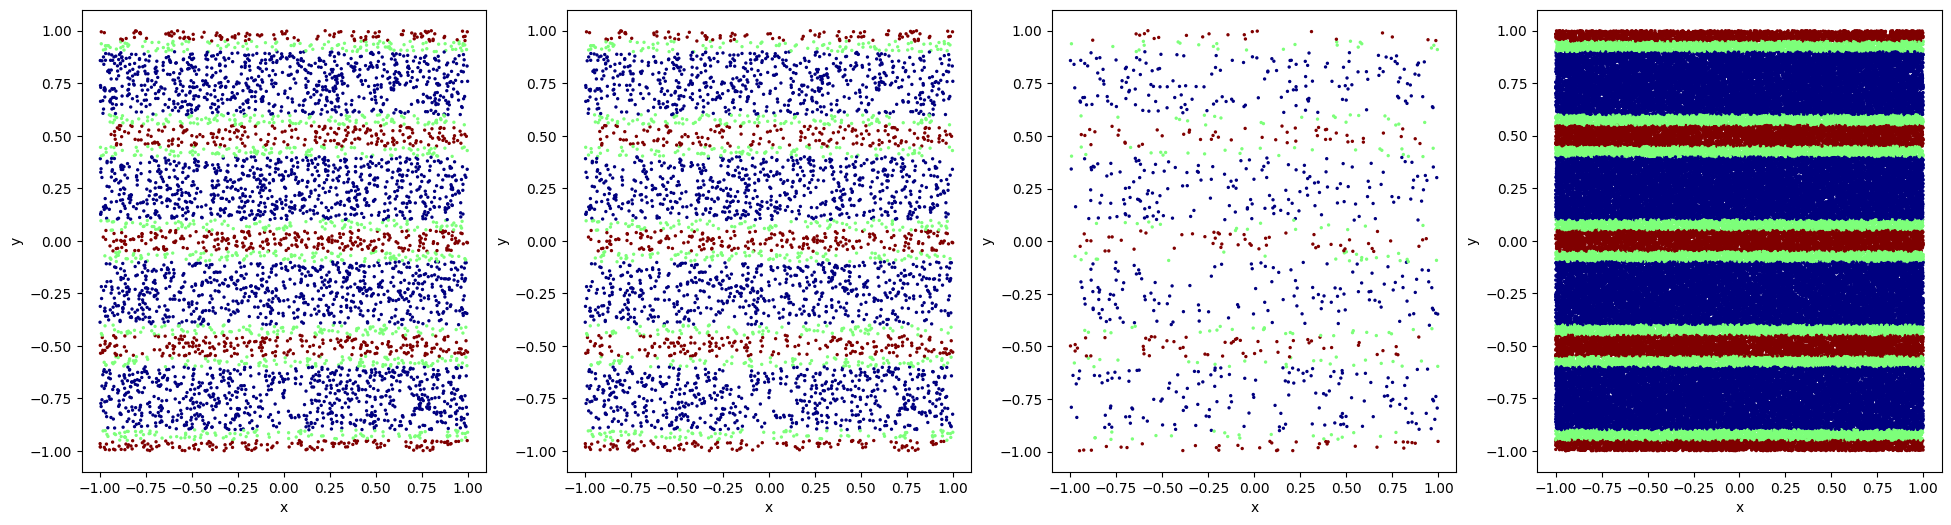

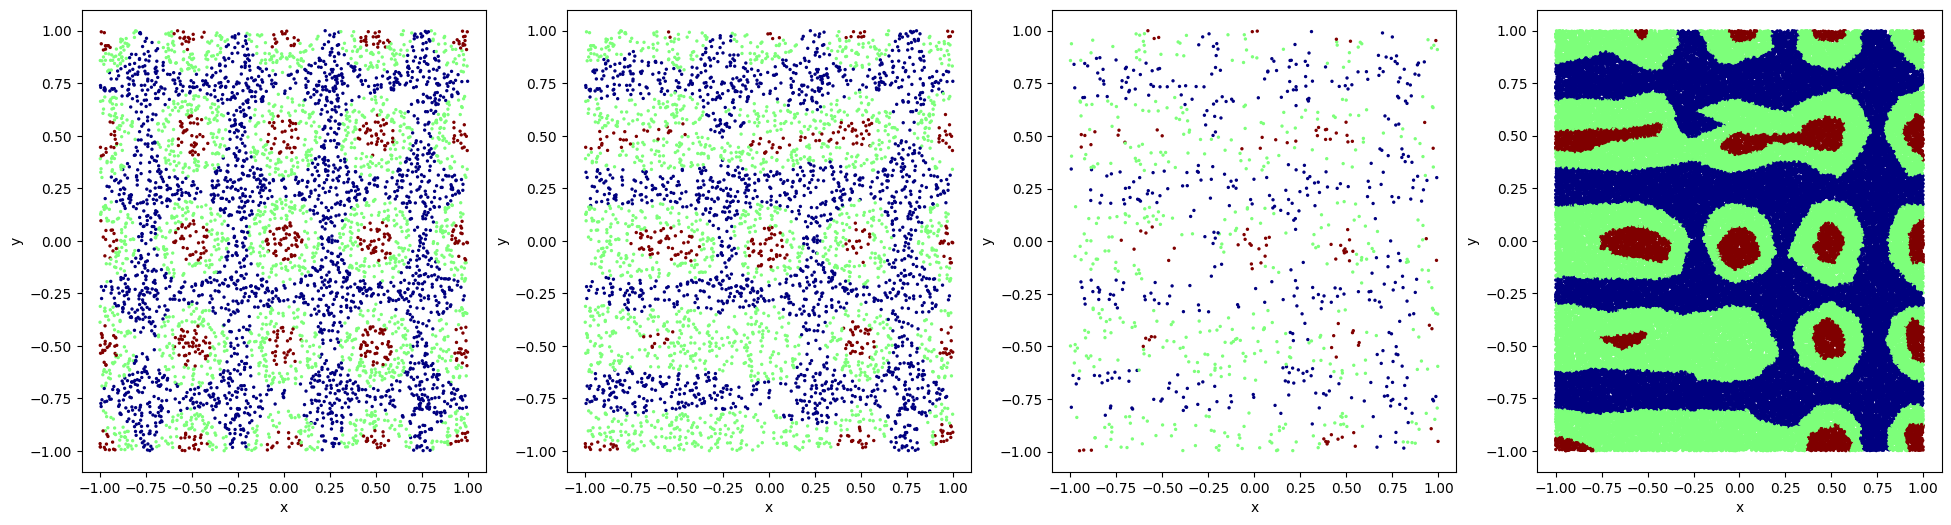

In [17]:
Y_pred_train = np.zeros((X_train.shape[0],3))
Y_pred_test = np.zeros((X_test.shape[0],3))

X_plot = 2*(np.random.rand(int(1e5),2)-0.5)
Y_plot = np.zeros((X_plot.shape[0],3))

Y_pred_train[:,0] = grid_X_by_L1(X_train, np.arange(-1,1.5,0.5), [0.1, 0.05]).reshape(-1)
Y_pred_train[:,1] = grid_Y_by_L1(X_train, np.arange(-1,1.5,0.5), [0.1, 0.05]).reshape(-1)
Y_pred_train[:,2] = grid_by_L2(X_train, np.arange(-1,1.5,0.5), [0.2, 0.1]).reshape(-1)

Y_pred_test[:,0] = grid_X_by_L1(X_test, np.arange(-1,1.5,0.5), [0.1, 0.05]).reshape(-1)
Y_pred_test[:,1] = grid_Y_by_L1(X_test, np.arange(-1,1.5,0.5), [0.1, 0.05]).reshape(-1)
Y_pred_test[:,2] = grid_by_L2(X_test, np.arange(-1,1.5,0.5), [0.2, 0.1]).reshape(-1)

Y_pred_train[:,2] = one_hot_to_predictions(nn._compute_output(X_train)).reshape(-1)

Y_pred_test[:,2] = one_hot_to_predictions(nn._compute_output(X_test)).reshape(-1)



Y_plot[:,0] = grid_X_by_L1(X_plot, np.arange(-1,1.5,0.5), [0.1, 0.05]).reshape(-1)
Y_plot[:,1] = grid_Y_by_L1(X_plot, np.arange(-1,1.5,0.5), [0.1, 0.05]).reshape(-1)
Y_plot[:,2] = grid_by_L2(X_plot, np.arange(-1,1.5,0.5), [0.2, 0.1]).reshape(-1)

Y_plot[:,2] = one_hot_to_predictions(nn._compute_output(X_plot)).reshape(-1)

# plt.figure(figsize=(24,6))
# plt.subplot(1,4,1)
# # plt.imshow(zxp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.scatter(xx[:,0], xx[:,1], c=yy[:,0]/2, cmap="jet", s=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.subplot(1,4,2)
# # plt.imshow(zyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train[:,0]/2, cmap="jet", s=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.subplot(1,4,3)
# # plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred_test[:,0]/2, cmap="jet", s=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.subplot(1,4,4)
# # plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.scatter(X_plot[:,0], X_plot[:,1], c=Y_plot[:,0]/2, cmap="jet", s=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

# plt.figure(figsize=(24,6))
# plt.subplot(1,4,1)
# # plt.imshow(zxp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.scatter(xx[:,0], xx[:,1], c=yy[:,1]/2, cmap="jet", s=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.subplot(1,4,2)
# # plt.imshow(zyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train[:,1]/2, cmap="jet", s=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.subplot(1,4,3)
# # plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred_test[:,1]/2, cmap="jet", s=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.subplot(1,4,4)
# # plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
# plt.scatter(X_plot[:,0], X_plot[:,1], c=Y_plot[:,1]/2, cmap="jet", s=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
# plt.imshow(zxp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.scatter(xx[:,0], xx[:,1], c=yy[:,2]/2, cmap="jet", s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,4,2)
# plt.imshow(zyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train[:,2]/2, cmap="jet", s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,4,3)
# plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred_test[:,2]/2, cmap="jet", s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,4,4)
# plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.scatter(X_plot[:,0], X_plot[:,1], c=Y_plot[:,2]/2, cmap="jet", s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [13]:
one_hot_to_predictions(nn._compute_output(X_train))

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])